In [48]:
# Dataset
# https://www.kaggle.com/datasets/kianwee/agricultural-raw-material-prices-19902020?resource=download

# KDD na prática
  # Seleção, Pré-processamento, Transformação, Mineração e Avaliação

# Importação dos Pacotes e Módulos

In [49]:
import numpy as np
import pandas as pd

# Instalação do seaborn
!pip install seaborn
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

# **Seleção** de dados e Visulização dos dados

In [87]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vREo_FDARiSgtYeAOLwBa79A7-TdW8BDExSpKofA168Q2z65xn3lZr4WOFOk0zpgpi7EvS0t_M8dBCt/pub?gid=327231942&single=true&output=csv')
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,jan.-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,mar.-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


In [88]:
# Visualizando o conjunto de dados do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [89]:
# Verificando valores negativos ou nulos
df.isnull().sum()

,0
Month,0
Coarse wool Price,34
Coarse wool price % Change,34
Copra Price,22
Copra price % Change,22
Cotton Price,0
Cotton price % Change,0
Fine wool Price,34
Fine wool price % Change,34
Hard log Price,0


# **Pré-processamento** (Corrigindo inconsistência dos dados)

In [90]:
print(df['Month'].dtype)

print(df['Month'].unique())

object
['Apr-90' 'May-90' 'Jun-90' 'Jul-90' 'Aug-90' 'Sep-90' 'Oct-90' 'Nov-90'
 'Dec-90' 'Jan-91' 'Feb-91' 'Mar-91' 'Apr-91' 'May-91' 'Jun-91' 'Jul-91'
 'Aug-91' 'Sep-91' 'Oct-91' 'Nov-91' 'Dec-91' 'Jan-92' 'Feb-92' 'Mar-92'
 'Apr-92' 'May-92' 'Jun-92' 'Jul-92' 'Aug-92' 'Sep-92' 'Oct-92' 'Nov-92'
 'Dec-92' 'Jan-93' 'Feb-93' 'Mar-93' 'Apr-93' 'May-93' 'Jun-93' 'Jul-93'
 'Aug-93' 'Sep-93' 'Oct-93' 'Nov-93' 'Dec-93' 'Jan-94' 'Feb-94' 'Mar-94'
 'Apr-94' 'May-94' 'Jun-94' 'Jul-94' 'Aug-94' 'Sep-94' 'Oct-94' 'Nov-94'
 'Dec-94' 'Jan-95' 'Feb-95' 'Mar-95' 'Apr-95' 'May-95' 'Jun-95' 'Jul-95'
 'Aug-95' 'Sep-95' 'Oct-95' 'Nov-95' 'Dec-95' 'Jan-96' 'Feb-96' 'Mar-96'
 'Apr-96' 'May-96' 'Jun-96' 'Jul-96' 'Aug-96' 'Sep-96' 'Oct-96' 'Nov-96'
 'Dec-96' 'Jan-97' 'Feb-97' 'Mar-97' 'Apr-97' 'May-97' 'Jun-97' 'Jul-97'
 'Aug-97' 'Sep-97' 'Oct-97' 'Nov-97' 'Dec-97' 'Jan-98' 'Feb-98' 'Mar-98'
 'Apr-98' 'May-98' 'Jun-98' 'Jul-98' 'Aug-98' 'Sep-98' 'Oct-98' 'Nov-98'
 'Dec-98' 'Jan-99' 'Feb-99' 'Mar-99' 'Apr-99

In [91]:
## Substituindo %, "," e "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace(r'.*\.-.*', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('MAY90', np.nan)
df = df.replace('', np.nan)




##Removendo linhas com Valores Nulos
df = df.dropna()

## Convertendo o tipo de dados para float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

,0
Month,object
Coarse wool Price,float64
Coarse wool price % Change,float64
Copra Price,float64
Copra price % Change,float64
Cotton Price,float64
Cotton price % Change,float64
Fine wool Price,float64
Fine wool price % Change,float64
Hard log Price,float64


In [92]:
# Verificando novamente valores negativos ou nulos
df.isnull().sum()

,0
Month,0
Coarse wool Price,0
Coarse wool price % Change,0
Copra Price,0
Copra price % Change,0
Cotton Price,0
Cotton price % Change,0
Fine wool Price,0
Fine wool price % Change,0
Hard log Price,0


In [93]:
# Visualizando dados após o pré-processamento
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Oct16,1023.64,3.59,963.75,5.98,1.73,0.58,1188.10,3.55,286.86,...,526.16,1.81,1.66,5.73,174.41,12.51,299.46,5.04,875.00,0.00
320,Dec16,1002.56,1.63,1127.00,10.38,1.75,0.57,1196.96,0.65,256.42,...,470.33,6.80,2.23,19.25,156.07,2.75,310.13,1.88,875.00,0.00
322,Feb17,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
324,Apr17,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00


# **Transformação** de dados

In [94]:
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
df = df.set_index('Month')

In [95]:
# Visulizando após a transformação
df

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-01,1023.64,3.59,963.75,5.98,1.73,0.58,1188.10,3.55,286.86,1.81,...,526.16,1.81,1.66,5.73,174.41,12.51,299.46,5.04,875.00,0.00
2016-12-01,1002.56,1.63,1127.00,10.38,1.75,0.57,1196.96,0.65,256.42,6.80,...,470.33,6.80,2.23,19.25,156.07,2.75,310.13,1.88,875.00,0.00
2017-02-01,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,1.88,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00


In [96]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

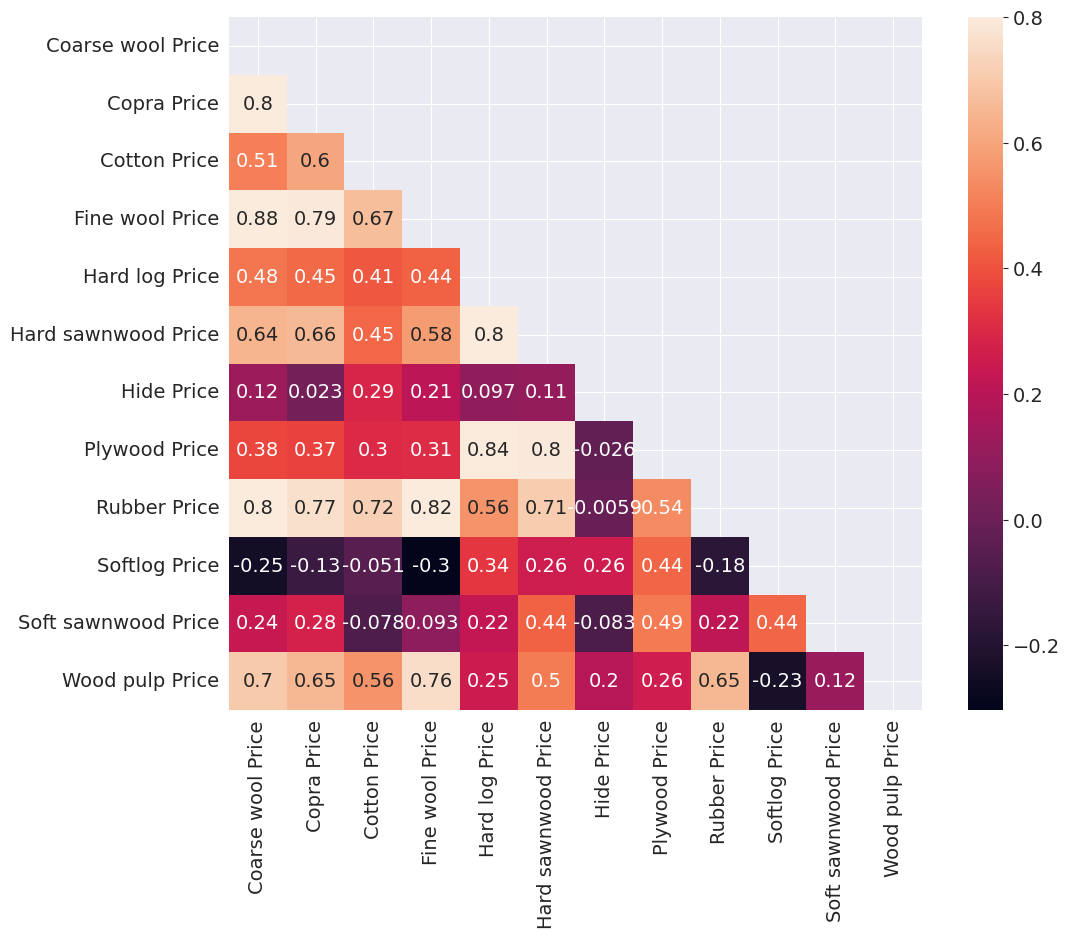

In [97]:
# Mapa de Calor - Sem o percetual
 # O mapa de calor mostra a correlação entre as matérias-primas
 # Quanto maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas, mas não necessariamente

##Lista das relações que queremos
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

##Capturando a matriz de correlação
corrmat = df[raw_data].corr()

##Alterando o tamanho do Plot
fig = plt.figure(figsize = (12, 9))

##Mascarando a parte superior do trem, pois a matriz é simétrica (repetitiva)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

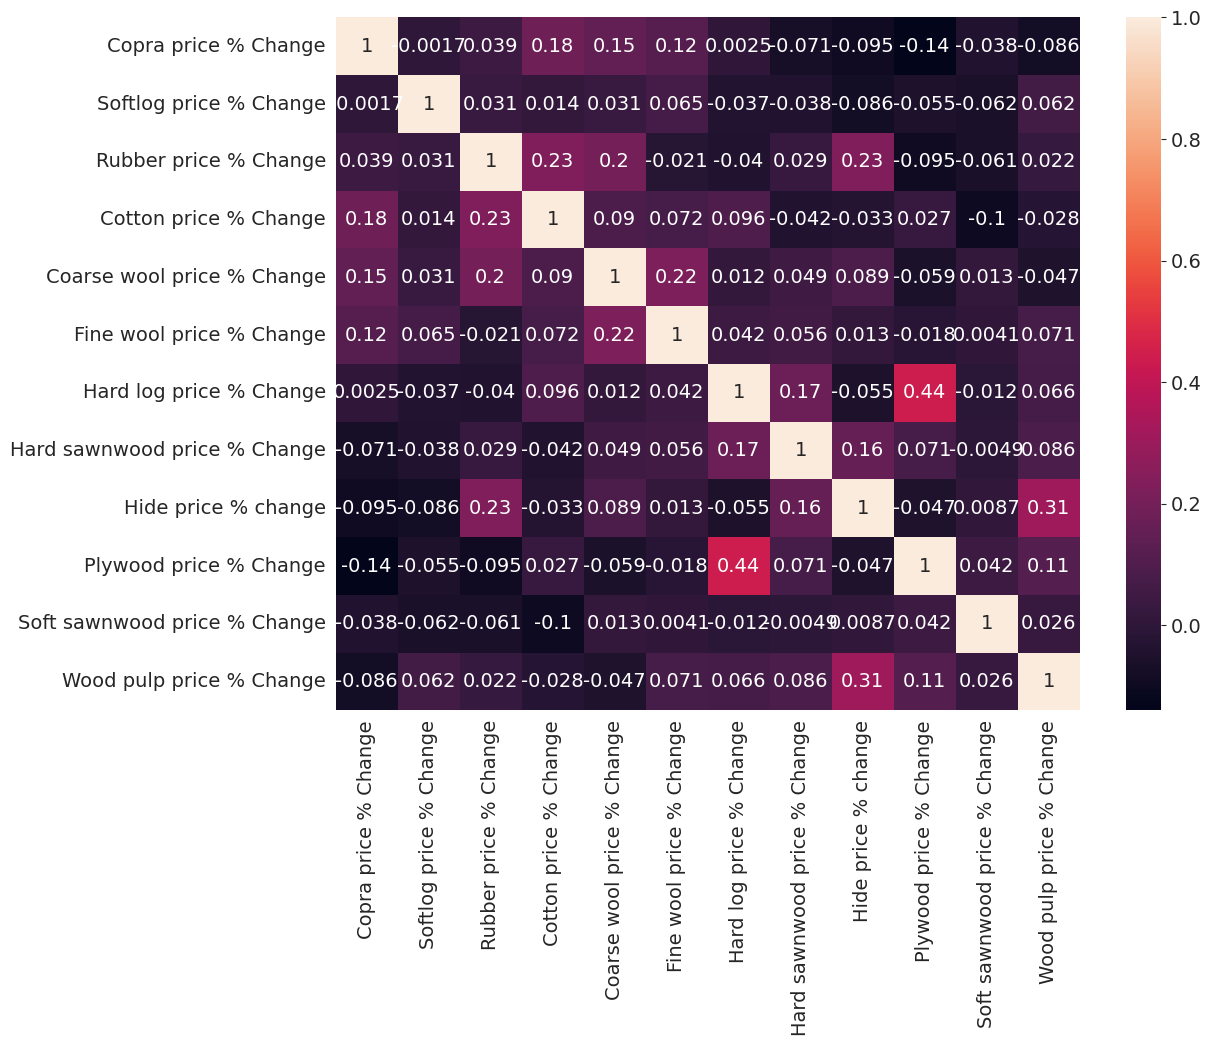

In [98]:
# Mapa de Calor - Só o percetual
plt.figure(figsize=(12,9))
changelist=['Copra price % Change',
            'Softlog price % Change',
            'Rubber price % Change',
            'Cotton price % Change',
            'Coarse wool price % Change',
            'Fine wool price % Change',
            'Hard log price % Change',
            'Hard sawnwood price % Change',
            'Hide price % change',
            'Plywood price % Change',
            'Soft sawnwood price % Change',
            'Wood pulp price % Change']

#Gerando a correlação na matriz
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

> Aqui entraria algum modelo que seria treinado com esses dados para vazer a mineração dos mesmo.